In [3]:
#データ取得
#データの読み込み

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
%matplotlib inline

data_train = pd.read_csv("titanic_train.csv")
data_test = pd.read_csv("titanic_test.csv")

pd.DataFrame(data_train).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#前処理について記述せよ  

前処理とは何か  
→データを機械学習を行うに際して都合の良い形に変換すること  
  
なぜ前処理を行う必要があるのか  
→機械学習を行った際にエラーを防ぎ、より正確な結果を得るために必要  
  
前処理は具体的に何を行うか(3つ以上記述せよ)  
→１、欠損値の対応 ２、全て数値データにする ３、正規化   
  

前述した具体的な前処理について、その前処理を行うと何を得ることができるか(記述したそれぞれの前処理例について記述せよ)  
→  
1,欠損値を保管する事でデータ数を増やせる。欠損値を取り除く事でエラーを防ぐ事ができる  
2,数値データにする事で説明変数を追加できる  
3,正規化する事で計算するときにスケールの違いに値が引っ張られてしまうのを防ぐ事ができ、より正確な機械学習結果が得られる、  

#2前処理について記述せよ  
  
前処理について記述せよの調査により、データを確認する際にどのような点を見るとよいか、3つ以上記述せよ  
→1,空白や不明になっているデータが存在しないか。  
２、文字によるデータが存在しないか  
   ３、データの値について明らかな大小が存在しないか。  
   ４、大きく値が外れているデータが存在しないか？  

In [4]:
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df    

def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

data_train = transform_features(data_train)
data_test = transform_features(data_test)

data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,male,Student,1,0,1_quartile,N,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4_quartile,C,"Cumings,",Mrs.
2,3,1,3,female,Young Adult,0,0,1_quartile,N,"Heikkinen,",Miss.
3,4,1,1,female,Young Adult,1,0,4_quartile,C,"Futrelle,",Mrs.
4,5,0,3,male,Young Adult,0,0,2_quartile,N,"Allen,",Mr.


In [5]:
from sklearn import preprocessing
def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df_combined = pd.concat([df_train[features], df_test[features]])

    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test

data_train, data_test = encode_features(data_train, data_test)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,1,4,1,0,0,7,100,19
1,2,1,1,0,0,1,0,3,2,182,20
2,3,1,3,0,7,0,0,0,7,329,16
3,4,1,1,0,7,1,0,3,2,267,20
4,5,0,3,1,7,0,0,1,7,15,19


simplify_ages  
→　年齢の値から　BabyーAdultのカテゴリに分ける。厳密な値による過学習を防いでいる。
  
simplify_cabins→"cabin"についてを頭文字のみ取っている。頭文字だけ取る事でどのエリアのcabinにいたかをカテゴライズしている。過学習を防いでいる  
  
simplify_fares→払ったチケットの料金についてカテゴライズしている。カテゴライズする事で過学習を防ぐ事ができる  
  
format_name→Lastnameと敬称を抜き出してそれらについて新しい列を追加している。家族関係でカテゴライズしている
  
drop_features→相関の低そうな列を消している。過学習を防ぎより高い予測制度を出すため。
  
encode_features→トレーニングデータとテストデータを連結し、データの列ごとにカテゴライズを数値化する。データを全て数値に変換することによって機械学習が可能になる。  

#モデル選択について記述せよ  
  
今回は、生存予測（分類）を行いますが、この分類について使用できそうな手法を4つ以上しらべて記述せよ。  
→１、線形サポートベクターマシン　２、ロジスティック回帰　３、決定木　４、k近傍法  

その手法の概要をそれぞれ記述せよ  
  
・線形サポートベクターマシン→回帰によって分類する手法。マージン最大化を取り入れている。  
・ロジスティック回帰→回帰によって分類する手法。線形回帰の出力をロジット関数に入力すること  
・決定木→ 木構造のモデルによって分類する手法。上から１つの説明変数とその閾値によってデータを２つに分け、さらに枝先で同様に別基準でデータを分けることによって、分類するモデル  
・k近傍法→。指定した説明変数からデータ間の距離を計算し、分類するデータに近いk個(入力値)の分類内容から最も多い分類を採用する  

その手法の長所/短所をそれぞれ3つずつ、記述したすべての手法において記述せよ  
→  
・線形サポートベクターマシン    
長所：１、データ特徴の次元が多くなっても精度が良い　２、最適化すべきパラーメータが少ない　３、パラメータ算出が簡単  
短所：１、学習データが多くなると計算量が膨大　２、基本的に２クラス分類にしか使えない　３、多クラスを考慮に入れた識別関数の最適化・超平面作成は困難)  
  
・ロジスティック回帰  
長所：出力として確率を得られる　２、線形分離できないデータにも適用できる　3、どの説明変数が予測精度に寄与するか比較的わかりやすい  
短所：1,独立変数を多くすると精度が低くなる可能性がある 2,予測精度はあまり高くない  3,線形回帰などに比べると目的変数に対する説明変数の寄与がわかりにくい
  
・決定木  
長所：１、データの前処理などがあまり必要ない　２、超平面では分割が困難であるような判別問題に対しても適用が可能　３、アウトプットの解釈が容易　　
  
短所：１、線型性のあるデータには適さない　２、XORの分類が不能　３、属性数が多く，また数多くの属性が目的変数に関係するようなデータの場合，決定木ではうまく表現しにくい）
  
・k近傍法  
長所：1、単純であり、実装が簡単．k-近傍への距離を計算すればよい．２、漸近的な性質が理論的に導出可能 ３、学習パターンが少なくても安定して動作する  
  
短所：１、ノイズに弱い２、kの選び方で結果が変わる。３、学習データが増えると計算コストが増大する



#モデル選択の基準  
  
下記の参考資料を元に、どのような視点からモデルを選択すれば良いか、最低でも3つ以上の視点を記述すること(他の参考資料でも構わない、その場合参考資料を明記すること)  
→  
  
予測精度：訓練データのみ精度が高くてその他で精度が低い過学習の問題を解消できるならば非線型性を有する手法ほど精度が高い傾向にある  
  
中身のわかりやすさ：入力に相当する説明変数と出力に相当する目的変数の間の関係が解釈できるか  
  
トレーニング時間：トレーニング時間と精度は密接に関係している。時間が限られている場合はアルゴリズムの選択を左右する事がある。  

In [6]:
#モデル選択におけるデータ可視化
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

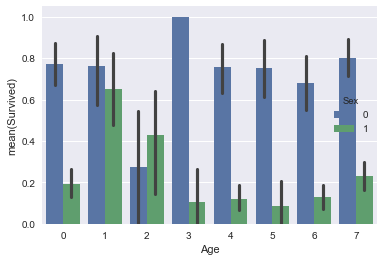

In [7]:
sns.barplot(x="Age", y="Survived", hue="Sex", data=data_train);

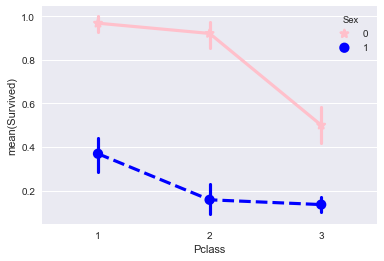

In [8]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data_train,
              palette={1: "blue", 0: "pink"},
              markers=["*", "o"], linestyles=["-", "--"]);

#データ可視化の結果について考察せよ  　　  
  
上記の２つの可視化から分かったことについて考察せよ。  　　  
→１、女性の方が生存者が多い。　　２、男性は若いほど生存者が多い　　３、Pclassが大きいほど生存確率が低い  
  
上記の考察結果から、モデル選択を考える場合、どのようなことが考えられるか    
→生存率と相関がある説明変数が複数あるので、多変量解析に適したモデルが望ましいのでは。  

In [9]:
from sklearn.model_selection import train_test_split

X = data_train.drop(['Survived', 'PassengerId'], axis=1)
y = data_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

#ランダムフォレストについて記述せよ  
  
決定木とはどのような手法か  
→木構造のモデルによって分類する手法。上から１つの説明変数とその閾値によってデータを２つに分け、さらに枝先で同様に別基準でデータを分けることによって、分類するモデル  　　
　　  
ランダムフォレストとはどのような手法か  
→入力となる学習データと識別ルールに使う特徴量をランダム選択し、多数の決定木を作成して多数決を取るモデル  
  
ランダムフォレストの長所と短所をそれぞれ3つ以上挙げてください  
→長所：  
１、特徴量の正規化、標準化が必要ない　　
２、並列化が容易　　
３、どの特徴量が重要か知る事ができる　　
  
短所：　　
１、複雑なデータではSVMなどの分類手法に比べて汎化性能が下がる　　
２、説明変数のうち意味のある変数がノイズ変数よりも極端に少ない場合にはうまく働かない　　
３、データに対してモデルをチューニングするため、少し労力が必要になる事がある　　
  
今回の目的からランダムフォレストの手法が適する理由を考察し、記述せよ  
→説明変数が多数で、どの説明変数が重要か調べる事ができるため  
欠損値があっても動作する。  
    
    


In [10]:
#学習
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [11]:
#accuracyを求めよ
y_pred = model.predict(X_test)
print("accuracyは{:.2f}".format(accuracy_score(y_test,y_pred)))

accuracyは0.82


In [12]:
 #精度を高める
print("precisionは{:.2f}".format(precision_score(y_test,y_pred)))

precisionは0.79


#ハイパーパラメーターとは何か  
  
ランダムフォレストにおいてどのようなハイパーパラメーターがあるか4つ以上記述せよ  
→１、決定木の数  
２、どの程度の深さの決定木を作成するか  
３、 目的変数のサンプリング時に、いくつの目的変数をサンプリングするか  
４、　各決定木を作るときに使う特徴量の数  
  
記述したハイパーパラメーターにおいて、それぞれどのような値が存在するか記述せよ（そのハイパーパラメーターを変化させるとどのようなことが起きるかも記述すること）  
  
→１、決定木の数  
２、どの程度の深さの決定木を作成するか  
３、 目的変数のサンプリング時に、いくつの目的変数をサンプリングするか  
 ４、　各決定木を作るときに使う特徴量の数  

In [13]:
#チューニング
from sklearn.model_selection import GridSearchCV
params={'n_estimators': [4, 6, 9],
'max_features': ['log2', 'sqrt','auto'],
'criterion': ['entropy', 'gini'],
'max_depth': [2, 3, 5, 10],
'min_samples_split': [2, 3, 5],
'min_samples_leaf': [1,5,8]}

model2 = RandomForestClassifier()
clf = GridSearchCV(model2, params)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [4, 6, 9], 'max_features': ['log2', 'sqrt', 'auto'], 'criterion': ['entropy', 'gini'], 'max_depth': [2, 3, 5, 10], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 5, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [14]:
print(clf.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=9, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [15]:
best_clf = clf.best_estimator_.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
print("accuracyは{:.2f}".format(accuracy_score(y_test,y_pred)))
print("precisionは{:.2f}".format(precision_score(y_test,y_pred)))

accuracyは0.83
precisionは0.79


#検証について記述せよ  
  
検証は何か  
→　構築した機械学習モデルの有効性を示すため  
  
なぜ検証を行う必要があるのか(Accuracyだけではダメな理由も含めること)  
→　精度が出ないなどの問題が発生した際に、それがモデル本体の問題なのか、学習のさせ方が悪いのか、実はモデルは大丈夫でアプリケーション側から使うときだけ問題があるのか、はてはデータの前処理でミスっているのかなどを切り分けてるため。  
  
主な検証方法について2つ以上記述せよ  
→(1) ホールドアウト法  
手元のデータを二分割し、一方を学習に、他方をテストに用いる。  
  
(2) K-分割交差検証  
→サンプル群をK個に分割し、そのうちの1つをテストデータとし残る K − 1 個を訓練事例とする。K個の組についてを全てをテストデータとするようにK回検証を行う。  


#KFoldについて記述せよ  
  
K-分割交差検証について説明せよ  
→サンプル群をK個に分割し、そのうちの1つをテストデータとし残る K − 1 個を訓練事例とする。K個の組についてを全てをテストデータとするようにK回検証を行う  
  
K-分割交差検証はデータセットを何個に分割するか  
→K個  
  
データセットを分割する際、その個数はどのように考えると良いか  
→個数が小さすぎると正確な評価ができない可能性がある。多すぎるとそれ以上多すぎても精度は横ばい（変化しない）になる  
  
K-分割交差検証は何回の検証を行うか  
→K回  
  
K-分割交差検証の結果は、最終的にどのように求められるか  
→K回の精度の値をそれぞれ足した後、Kで割る（平均をとる）事によってもとまる。  

In [16]:
#Kfoldの結果を確認する

from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
list_accuracy = []
for train_index, test_index in kf.split(data_train):    
    X_train = pd.DataFrame(data_train.drop(['Survived', 'PassengerId'], axis=1).values[train_index])
    y_train = pd.DataFrame(data_train['Survived'].values[train_index])
    X_test = pd.DataFrame(data_train.drop(['Survived', 'PassengerId'], axis=1).values[test_index])
    y_test = pd.DataFrame(data_train['Survived'].values[test_index])
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    list_accuracy.append(accuracy)

print("accuracyは{:.2f}".format(np.average(np.array(list_accuracy))))


accuracyは0.80


/Users/kenji_tachibana/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
/Users/kenji_tachibana/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
/Users/kenji_tachibana/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
/Users/kenji_tachibana/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was 

In [29]:
### どの特徴量が重要であったかを調査する
print(np.argmax(model.feature_importances_))
print(model.feature_importances_)
print("ラストネームが一番重要な特徴量であった")

7
[ 0.07835619  0.21464399  0.08540171  0.05325285  0.03416412  0.06650103
  0.06028958  0.30529235  0.10209817]


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,1,4,1,0,0,7,100,19
1,2,1,1,0,0,1,0,3,2,182,20
2,3,1,3,0,7,0,0,0,7,329,16
3,4,1,1,0,7,1,0,3,2,267,20
4,5,0,3,1,7,0,0,1,7,15,19
5,6,0,3,1,6,0,0,1,7,538,19
6,7,0,1,1,0,0,0,3,4,500,19
7,8,0,3,1,1,3,1,2,7,608,13
8,9,1,3,0,7,0,2,1,7,382,20
9,10,1,2,0,5,1,0,2,7,559,20
